## Data Processing

In [3]:
import seaborn as sns
diamonds = sns.load_dataset('diamonds')
df = diamonds.copy()
df = df.select_dtypes(include=['float64', 'int64'])

In [4]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_table = df['table'].copy()

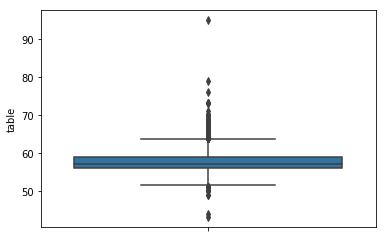

In [6]:
sns.boxplot(x=df_table, orient='v', notch=False)

In [7]:
q1 = df_table.quantile(0.25)
q3 = df_table.quantile(0.75)
iqr = q3 - q1

lower_limit = q1 - 1.5 * iqr
upper_limit = q3 + 1.5 * iqr
q3

59.0

In [8]:
check = (df_table < (lower_limit)) | (df_table > (upper_limit))

In [9]:
check

0        False
1        False
2         True
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
53910    False
53911    False
53912    False
53913    False
53914    False
53915    False
53916    False
53917    False
53918    False
53919    False
53920    False
53921    False
53922    False
53923    False
53924    False
53925    False
53926    False
53927    False
53928    False
53929    False
53930    False
53931    False
53932    False
53933    False
53934    False
53935    False
53936    False
53937    False
53938    False
53939    False
Name: table, Length: 53940, dtype: bool

In [10]:
df_table_filter = df_table[check]

In [11]:
df_table_filter.index

Int64Index([    2,    91,   145,   219,   227,   239,   296,   314,   356,
              359,
            ...
            53226, 53503, 53542, 53577, 53660, 53695, 53697, 53756, 53757,
            53785],
           dtype='int64', length=605)

### Removing outliers

In [12]:
df_table.shape

(53940,)

In [13]:
cleaned_df_table = df_table[~((df_table < lower_limit) | (df_table > (upper_limit)))]

In [14]:
cleaned_df_table.shape

(53335,)

### Assign mean of the sample to outliers.

In [15]:
df_table = df['table'].copy()

In [16]:
df_table_filter.head()

2      65.0
91     69.0
145    64.0
219    64.0
227    67.0
Name: table, dtype: float64

In [17]:
df_table[df_table_filter.index] = df_table.mean()

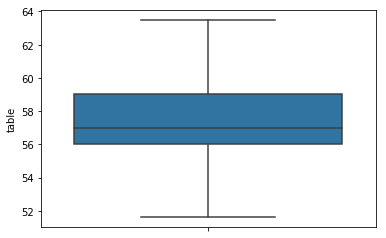

In [18]:
sns.boxplot(x=df_table, orient='v', notch=False)

### Supression

In [19]:
df_table = df['table'].copy()

In [20]:
df_table.describe()

count    53940.000000
mean        57.457184
std          2.234491
min         43.000000
25%         56.000000
50%         57.000000
75%         59.000000
max         95.000000
Name: table, dtype: float64

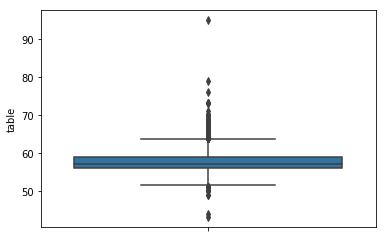

In [21]:
sns.boxplot(x=df_table, orient='v', notch=False)

In [22]:
lower_limit_tf = df_table < lower_limit
upper_limit_tf = df_table > upper_limit

df_table[lower_limit_tf] = lower_limit
df_table[upper_limit_tf] = upper_limit

In [23]:
df_table.describe()

count    53940.000000
mean        57.438561
std          2.161139
min         51.500000
25%         56.000000
50%         57.000000
75%         59.000000
max         63.500000
Name: table, dtype: float64

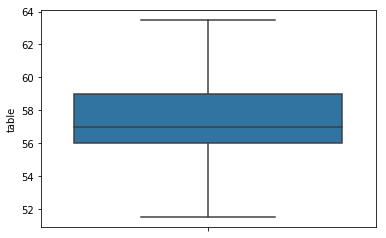

In [24]:
sns.boxplot(x=df_table, orient='v', notch=False)

### Normal distribution

In [25]:
from scipy.stats import norm
import seaborn as sns

data_normal = norm.rvs(size = 10000)

[Text(0, 0.5, 'Frekance'), Text(0.5, 0, 'Normal')]

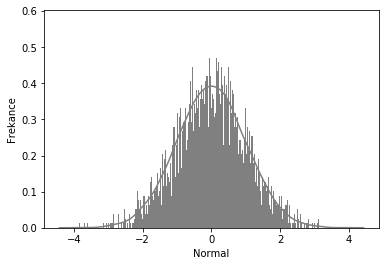

In [26]:
ax = sns.distplot(data_normal, bins=1000, kde=True, color='gray', hist_kws={'linewidth': 15, 'alpha': 1})
ax.set(xlabel='Normal', ylabel='Frekance')

### One Sample T-Test

#### Our sample need to be normal distribution to make a One Samle T-Test 

In [27]:
import numpy as np

### Problem: Is the average time which is spent in our website 170s?

## Hypotesis
### h0: average time = 170 (average time is equal to 170)
### h1: average time != 170 (average time is not equal to 170)

In [28]:
ms = np.random.normal(169, size = 200)

In [29]:
ms

array([169.29173273, 169.21411098, 169.48913056, 169.05517064,
       168.99939152, 170.19662712, 170.51611618, 167.49244706,
       169.01002115, 168.31130557, 168.68902853, 169.40251621,
       169.66943837, 168.88787356, 167.08665967, 168.03495442,
       169.89649967, 166.25957358, 170.18742715, 169.52122999,
       170.31617608, 168.80143081, 166.93859458, 169.43036264,
       170.27465312, 169.92472181, 168.33730852, 169.08676108,
       168.46716373, 168.18073354, 169.95538857, 167.80246769,
       168.10618357, 167.89597437, 167.50975248, 169.14641429,
       170.16150305, 168.81512324, 167.4942522 , 169.83994454,
       170.68570175, 168.35375768, 168.52144573, 169.51566063,
       170.62187375, 168.48016585, 167.66755022, 169.63141861,
       169.79906807, 169.00613145, 168.44186674, 169.99437873,
       169.528036  , 168.23156448, 169.04909473, 167.64829247,
       169.68589046, 168.73776643, 168.56428917, 168.96712551,
       169.0403077 , 169.89493006, 169.59109053, 168.84

In [30]:
import scipy.stats as st

In [31]:
st.describe(ms)

DescribeResult(nobs=200, minmax=(166.25957357796506, 171.57275238924447), mean=169.02718835499215, variance=0.9401736380495667, skewness=-0.09856869104158136, kurtosis=-0.01426730200101689)

#### Check the sample is normal distribution 

In [32]:
import pandas as pd
from matplotlib.pyplot import plot

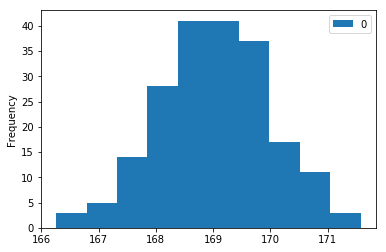

In [33]:
pd.DataFrame(ms).plot.hist()

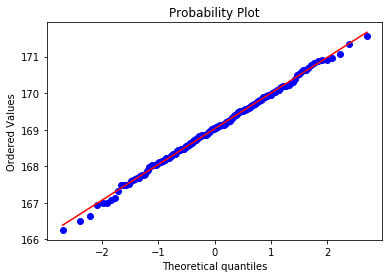

In [34]:
import pylab
st.probplot(ms, dist='norm', plot=pylab)
pylab.show()

### shapiro-wilks

In [35]:
from scipy.stats import shapiro
shapiro(ms)

(0.9973828792572021, 0.9847639203071594)

In [36]:
st.ttest_1samp(ms, popmean=170)

Ttest_1sampResult(statistic=-14.188605824260048, pvalue=4.964202233857293e-32)

### Local Outlier Factor

In [37]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor

np.random.seed(42)
X_inliers = np.random.normal(70, 3, (100, 2))
X_inliers = np.r_[X_inliers + 10, X_inliers - 10]

print(X_inliers.shape)

(200, 2)


In [38]:
X_inliers[:10, :2]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [39]:
X_outliers = np.random.uniform(low=15, high=130, size=(20, 2))

In [40]:
X_outliers[:5, :2]

array([[115.89790327, 100.18839104],
       [ 95.15681021,  95.78566966],
       [ 56.34148239,  48.76306209],
       [108.07653288, 108.16304039],
       [114.71331664, 120.02266354]])

In [41]:
data = np.r_[X_inliers, X_outliers]

In [42]:
data[0:3, :]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913]])

In [43]:
LOF = LocalOutlierFactor(n_neighbors=20, contamination=0.1)

In [44]:
LOF.fit_predict(data)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [45]:
X_score = LOF.negative_outlier_factor_

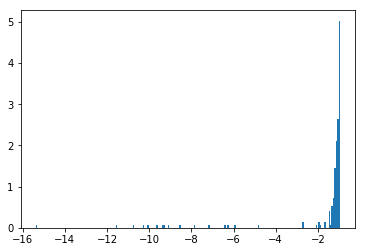

In [46]:
plt.hist(X_score, bins='auto', density=True)
plt.show;

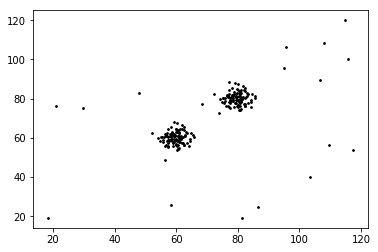

In [47]:
plt.scatter(data[:,0], data[:,1], color='k', s=3);

In [48]:
upper_limit = np.sort(X_score)[9]

In [49]:
outlier_check_values = (X_score > upper_limit)

In [50]:
outlier_check_values[:20,]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

### OUTLIERS

In [51]:
data[~outlier_check_values]

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

## DATA WITHOUT OUTLIERS

In [52]:
data[outlier_check_values][:10,]

array([[81.49014246, 79.5852071 ],
       [81.94306561, 84.56908957],
       [79.29753988, 79.29758913],
       [84.73763845, 82.30230419],
       [78.59157684, 81.62768013],
       [78.60974692, 78.60281074],
       [80.72588681, 74.26015927],
       [74.8252465 , 78.31313741],
       [76.96150664, 80.942742  ],
       [77.27592777, 75.7630889 ]])

In [55]:
df_x = data.copy()

In [59]:
np.mean(df_x[1])

83.25607759176307

In [60]:
df_x[1]

array([81.94306561, 84.56908957])

In [61]:
outliers = df_x[~outlier_check_values]

In [68]:
outliers

array([[114.71331664, 120.02266354],
       [117.35061431,  53.86944304],
       [ 58.19203955,  25.80792308],
       [ 81.50221621,  19.13336149],
       [ 18.50752874,  19.29504171],
       [109.59906448,  56.42192376],
       [ 29.61195895,  75.05797491],
       [103.54925861,  39.81941816],
       [ 86.63240472,  24.81495847],
       [ 20.94339793,  76.10578263]])

In [71]:
outliers[:, :1] = np.mean(df_x[0])

In [72]:
outliers[:, :1]

array([[80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478],
       [80.53767478]])

In [79]:
outliers[:,1:2] = np.mean(df_x[1])

In [80]:
outliers[:,1:2]

array([[83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759],
       [83.25607759]])

In [81]:
df_x[~outlier_check_values] = outliers

In [82]:
df_x[~outlier_check_values]

array([[80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759],
       [80.53767478, 83.25607759]])

### Supression

In [87]:
df_x = data.copy()

In [88]:
df_x[X_score == upper_limit]

array([[58.19203955, 25.80792308]])

In [89]:
df_x[~outlier_check_values] = df_x[X_score == upper_limit]

In [92]:
df_x[~outlier_check_values]

array([[58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308],
       [58.19203955, 25.80792308]])

### Incomplete observations

In [7]:
import numpy as np
import pandas as pd

v1 = np.array([3, 4, 5, 0, 9, np.NaN, np.NaN])
v2 = np.array([np.NaN, 6, np.NaN, 1, 0,92, 2])
v3 = np.array([3, 4, 5, np.NaN, 9,np.NaN , np.NaN])

df = pd.DataFrame({
    'v1': v1,
    'v2': v2,
    'v3': v3
})

df

,v1,v2,v3
0,3.0,NaN,3.0
1,4.0,6.0,4.0
2,5.0,NaN,5.0
3,0.0,1.0,NaN
4,9.0,0.0,9.0
5,NaN,92.0,NaN
6,NaN,2.0,NaN


In [8]:
df.isna().sum()

v1    2
v2    2
v3    3
dtype: int64

In [9]:
df.isnull().sum()

v1    2
v2    2
v3    3
dtype: int64

In [18]:
df.dropna()

,v1,v2,v3
1,4.0,6.0,4.0
4,9.0,0.0,9.0


In [19]:
df

,v1,v2,v3
0,3.0,NaN,3.0
1,4.0,6.0,4.0
2,5.0,NaN,5.0
3,0.0,1.0,NaN
4,9.0,0.0,9.0
5,NaN,92.0,NaN
6,NaN,2.0,NaN


In [20]:
df.isnull()

,v1,v2,v3
0,False,True,False
1,False,False,False
2,False,True,False
3,False,False,True
4,False,False,False
5,True,False,True
6,True,False,True


In [35]:
df.isnull().any(axis=1)

0     True
1    False
2     True
3     True
4    False
5     True
6     True
dtype: bool

In [39]:
df[df.isnull().any(axis=1)]

,v1,v2,v3
0,3.0,NaN,3.0
2,5.0,NaN,5.0
3,0.0,1.0,NaN
5,NaN,92.0,NaN
6,NaN,2.0,NaN
